## **Basic Image Classsification Model Using Artificial Neural Network**

In [2]:
#installing tensorflow
! pip install -q tensorflow-gpu

     |████████████████████████████████| 497.5 MB 26 kB/s 
     |████████████████████████████████| 462 kB 71.9 MB/s 


In [3]:
import tensorflow as tf

In [4]:
print(tf.__version__)

2.8.0


In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


In [6]:
from tensorflow.keras.datasets import fashion_mnist

In [7]:
#load dataset
(x_train,y_train),(x_test,y_test)=fashion_mnist.load_data()

4431872/4422102 [==============================] - 0s 0us/step


In [27]:
x_train.shape, x_test.shape

((60000, 784), (10000, 784))

In [9]:
y_train.shape, y_test.shape

((60000,), (10000,))

In [10]:
np.max(y_train), np.min(y_train)

(9, 0)

In [11]:
class_names = ['0 Top/T-shirt', '1 Trouser', '2 Pullover', '3 Dress', '4 Coat', '5 Sandal', '6 Shirt', '7 Sneaker', '8 Bag', '9 Ankle boot']
print(class_names)

['0 Top/T-shirt', '1 Trouser', '2 Pullover', '3 Dress', '4 Coat', '5 Sandal', '6 Shirt', '7 Sneaker', '8 Bag', '9 Ankle boot']


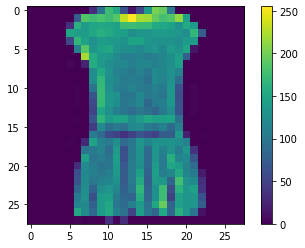

In [15]:
# Data Exploration
plt.figure()
plt.imshow(x_train[3])
plt.colorbar()

In [16]:
# Normalizing the dataset
x_train = x_train / 255.0
x_test = x_test / 255.0

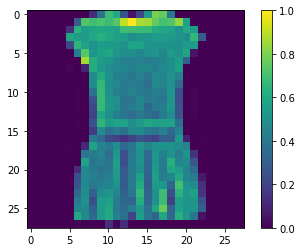

In [17]:
#check after normalization
plt.figure()
plt.imshow(x_train[3])
plt.colorbar()

In [18]:
# Flattening the dataset
x_train.shape, x_test.shape

((60000, 28, 28), (10000, 28, 28))

In [19]:
#reshaping the dataset
#For Flattens images to 1-D vector of 784 features (28*28) i.e., 
#it coverts the 2-D NumPy array of dimension 28*28 to a 1-D array of length 784

x_train = x_train.reshape(-1, 28*28)
x_test = x_test.reshape(-1, 28*28)
x_train.shape, x_test.shape

((60000, 784), (10000, 784))

In [20]:
#Build the model
# Define an object
model = tf.keras.models.Sequential()
# sequence of layers

# Adding first fully connected hidden layer
# 1) units (No of neurons) = 128
# 2) activation function = ReLU
# 3) input shape = 784
model.add(tf.keras.layers.Dense(units=128, activation='relu', input_shape=(784,)))

# Adding the second layer with dropout (30%)
model.add(tf.keras.layers.Dropout(0.3))
# regularization technique, prevents overfitting

# Adding the output layer
# 1) units = 10
# 2) activation = softmax
model.add(tf.keras.layers.Dense(units=10, activation='softmax'))


In [21]:
#Training the model
# Compiling the model
# 1) Optimizer = adam, (minimize the loss function)
# 2) loss function = sparse_categorical_crossentropy, (acts as guide to optimizer)
# 3) metrices = sparse_categorical_accuracy

model.compile(optimizer='adam',loss='sparse_categorical_crossentropy', metrics=['sparse_categorical_accuracy'])


In [22]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 128)               100480    
                                                                 
 dropout (Dropout)           (None, 128)               0         
                                                                 
 dense_1 (Dense)             (None, 10)                1290      
                                                                 
Total params: 101,770
Trainable params: 101,770
Non-trainable params: 0
_________________________________________________________________


In [23]:
# Training the model
model.fit(x_train,y_train, epochs=10)

Epoch 1/10
1875/1875 [==============================] - 5s 2ms/step - loss: 0.5509 - sparse_categorical_accuracy: 0.8063
Epoch 2/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.4193 - sparse_categorical_accuracy: 0.8479
Epoch 3/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3873 - sparse_categorical_accuracy: 0.8585
Epoch 4/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3654 - sparse_categorical_accuracy: 0.8668
Epoch 5/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3531 - sparse_categorical_accuracy: 0.8711
Epoch 6/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3398 - sparse_categorical_accuracy: 0.8757
Epoch 7/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3295 - sparse_categorical_accuracy: 0.8780
Epoch 8/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3203 - sparse_categorical_accuracy: 0.8814
Epoch 9/10
1875/1875 [==========

In [24]:
# Model evaluation
test_loss, test_accuracy = model.evaluate(x_test, y_test)

313/313 [==============================] - 1s 1ms/step - loss: 0.3540 - sparse_categorical_accuracy: 0.8770


In [26]:
test_accuracy

0.8769999742507935

In [32]:
# Model prediction
#y_pred = model.predict_classes(x_test)
y_pred = np.argmax(model.predict(x_test), axis=-1)
print(y_pred)

[9 2 1 ... 8 1 5]


In [33]:
y_pred[110],  y_test[110] # predicted and actual output
print(class_names)

['0 Top/T-shirt', '1 Trouser', '2 Pullover', '3 Dress', '4 Coat', '5 Sandal', '6 Shirt', '7 Sneaker', '8 Bag', '9 Ankle boot']


In [34]:
# Confusion metrix
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test,y_pred)
print(cm)

[[883   0   8  28   0   1  74   0   6   0]
 [  3 963   1  26   2   0   3   0   2   0]
 [ 23   0 775  18  91   0  91   0   2   0]
 [ 29   3   5 916  14   0  32   0   1   0]
 [  3   0 117  60 750   0  69   0   1   0]
 [  0   0   0   0   0 975   0  15   1   9]
 [162   0  91  34  78   0 627   0   8   0]
 [  0   0   0   0   0  19   0 968   0  13]
 [  8   0   0   6   2   3   8   5 968   0]
 [  0   0   0   0   0  11   1  43   0 945]]


In [35]:
acc_cm = accuracy_score(y_test, y_pred)
print(acc_cm)

0.877
